In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from RRNN import RRNN
from pyNN.utility.plotting import Figure, Panel

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


## Le ring accordé

### Effet de la bandwidth d'entrée

Ici, nous étudions l'effet d'une variation de la bandwidth d'entrée sur l'activité neuronale au sein d'un ring, en observant la représentation de l'entrée que l'on lui soumet par différentes populations.

Nous paramétrons le ring de telle sorte qu'il soit accordé. Puis, nous exécutons une simulation pour chaque valeur de bandwidth d'entrée désirée. Nous générons alors, pour chaque simulation, les rasterplots des populations source, excitatrice et inhibitrice.

Nous constatons alors que l'activité des neurones de la population excitatrice reproduit l'activité de la population source. Seuls les neurones dont les orientations préférées sont oprésentes dans la distribution d'entrée orientations sont actifs.

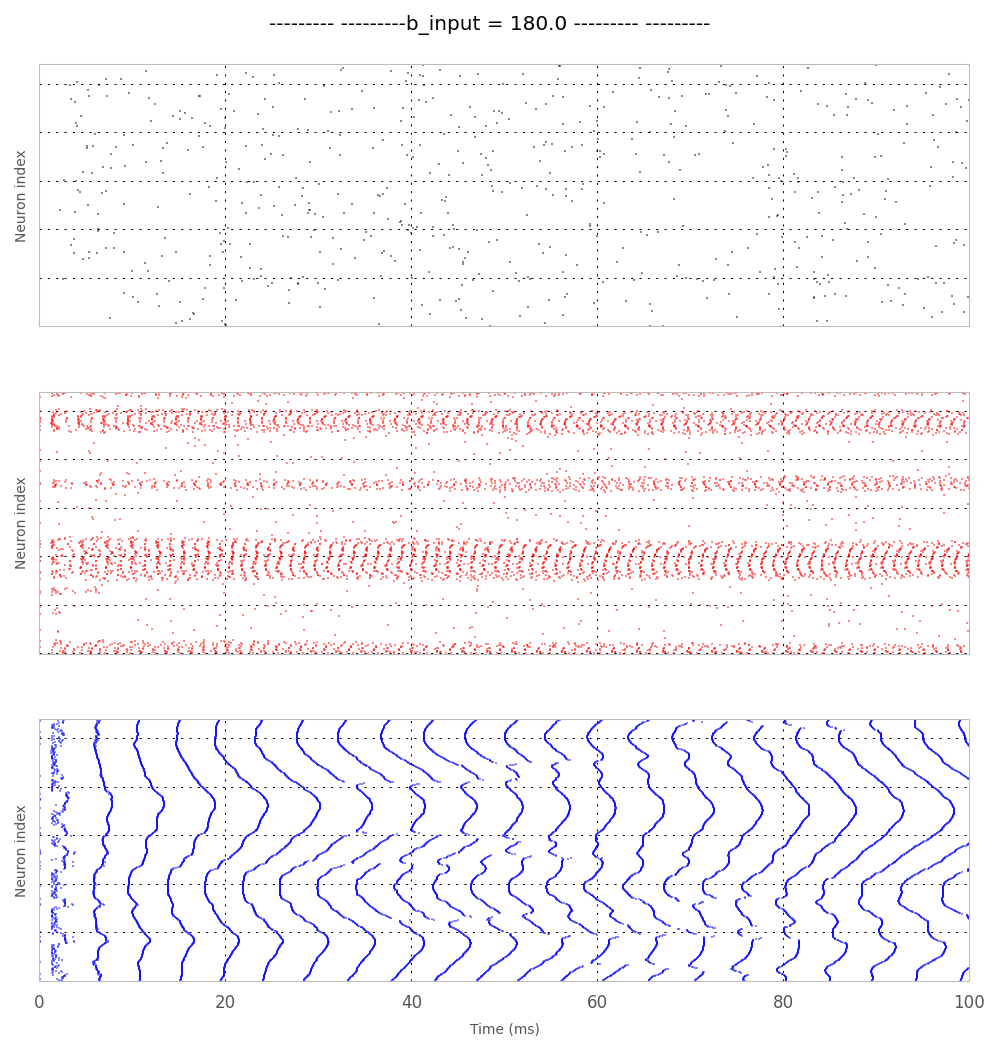

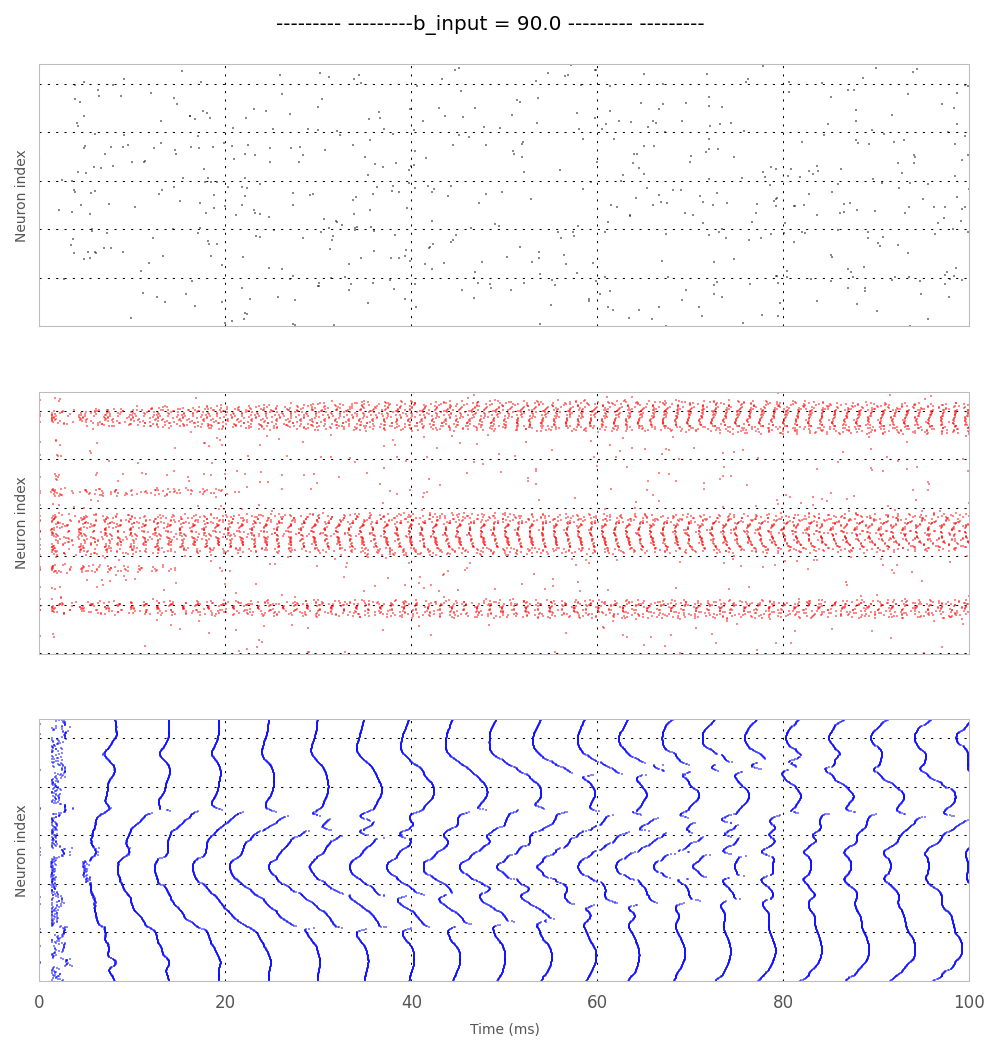

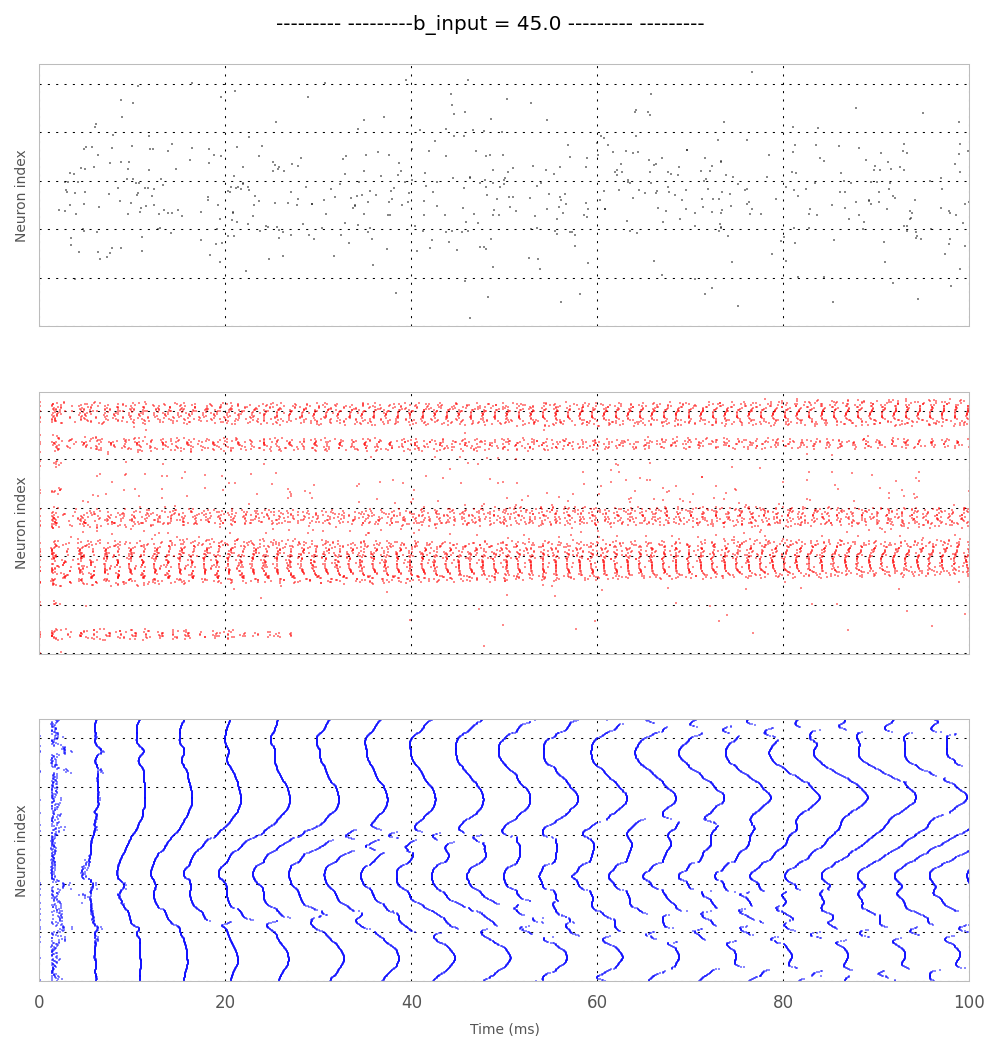

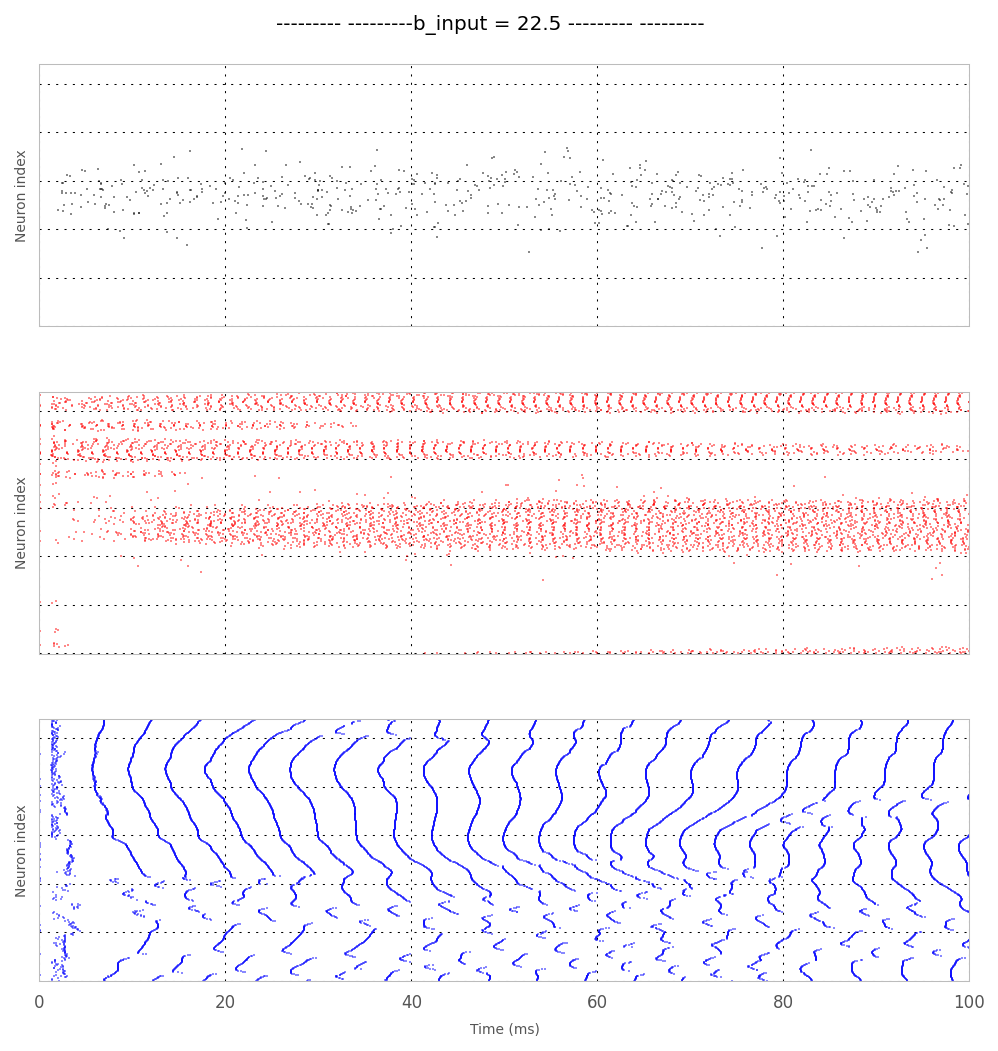

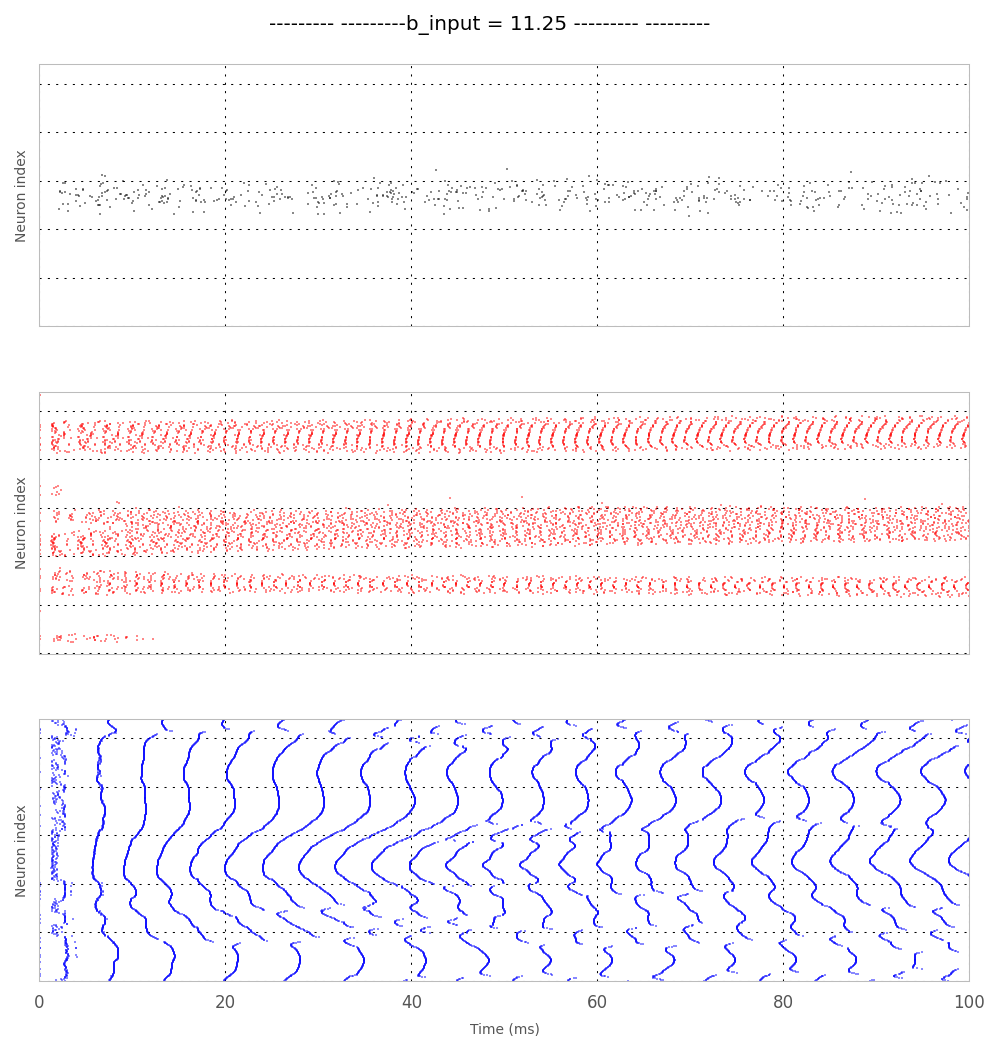

In [2]:
net = RRNN(ring=True, recurrent=True)
bws = 180*np.logspace(0, -4, 5, base=2)

for bw in bws:
    fig, ax = plt.subplots(figsize=(8,8))
    net.setParams(['b_input'], [bw])
    df, spikesE, spikesI = net.model()
    _ = net.Raster(df, spikesE, spikesI,
                  title='---------b_input = {} ---------'.format(str(bw)))

    plt.show()